# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [3]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    v1 = np.zeros((d))
    v2 = np.zeros((d))
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    out = []
    for x in X_test:
        a = ((np.linalg.norm(np.subtract(v1,x))**2)*(-1))/2
        b = ((np.linalg.norm(np.subtract(v2,x))**2)*(-1))/2
        n = (np.exp(a)*p1)/(np.exp(a)*p1 + np.exp(b)*p2)
        if n < 0.5 :
            out.append(-1)
        else :
            out.append(1)
            
    return np.array(out)
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    l1 = []
    l2 = []
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
            l1.append(X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
            l2.append(X_train[i])
            
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    l1 = (np.array(l1)-v1)
    l2 = (np.array(l2)-v2)
    sigma1 = np.matmul(np.transpose(l1),l1)/c1
    sigma2 = np.matmul(np.transpose(l2),l2)/c2
    sigma = (sigma1*p1)+(sigma2*p2)
    sigmainv = np.linalg.inv(sigma)
    out = []
    
    for x in X_test:
        y = np.subtract(x,v1)
        a = (np.prod(np.matmul(np.matmul(np.transpose(y),sigmainv),y))*-1)/2
        y = np.subtract(x,v2)
        b = (np.prod(np.matmul(np.matmul(np.transpose(y),sigmainv),y))* -1)/2
        n = (np.exp(a)*p1)/(np.exp(a)*p1 + np.exp(b)*p2)
        if n <= 0.5 :
            out.append(-1)
        else :
            out.append(1)
    return np.array(out)

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    l1 = []
    l2 = []
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
            l1.append(X_train[i])
        else :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i]) 
            l2.append(X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    p1 = (c1/(c1+c2))
    p2 = (1-p1)
    l1 = (np.array(l1)-v1)
    l2 = (np.array(l2)-v2)
    sigma1 = np.matmul(np.transpose(l1),l1)/c1
    sigma2 = np.matmul(np.transpose(l2),l2)/c2
    sigma1inv = np.linalg.inv(sigma1)
    sigma2inv = np.linalg.inv(sigma2)
    a1 = 1/np.sqrt(abs(np.linalg.det(sigma1)))
    b1 = 1/np.sqrt(abs(np.linalg.det(sigma2)))
    out = []
    
    for x in X_test:
        y = np.subtract(x,v1)
        a = (np.matmul(np.matmul(np.transpose(y),sigma1inv),y)*-1)/2
        y = np.subtract(x,v2)
        b = (np.matmul(np.matmul(np.transpose(y),sigma2inv),y)* -1)/2
        n = (a1*np.exp(a)*p1)/(a1*np.exp(a)*p1 + b1*np.exp(b)*p2)
        if n <= 0.5 :
            out.append(-1)
        else :
            out.append(1)
    return np.array(out)


In [4]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

x = np.load("C:\\Users\\hp\\Desktop\\PRML\\Archive\\dataset1_1.npz")
X_train1 = x['arr_0']
Y_train1 = x['arr_1']
X_test1 = x['arr_2']
Y_test1 = x['arr_3']

Y_pred_test_1a = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1b = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1c = Bayes1c(X_train1, Y_train1, X_test1)

n = len(X_train1)
c1 = 0
c2 = 0
c3 = 0
for i in range(n) :
    if Y_pred_test_1a[i] == Y_test1[i]:
        c1 = c1 + 1
    if Y_pred_test_1b[i] == Y_test1[i] :
        c2 = c2 + 1
    if Y_pred_test_1c[i] == Y_test1[i] :
        c3 = c3 + 1
print(c1/n)
print(c2/n)
print(c3/n)


0.874
0.8755
0.8755


** Cell type : TextWrite ** 
(Write your observations and table of errors here)




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [6]:
# Cell type : CodeWrite
# Fill in functions in this cell


def myhelper(X_train,Y_train):
    n = len(Y_train)
    d = len(X_train[0])
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    v1 = np.zeros(d)
    v2 = np.zeros(d)
    v3 = np.zeros(d)
    v4 = np.zeros(d)
    for i in range(n):
        if Y_train[i] == 1 :
            c1 = c1 + 1
            v1 = np.add(v1,X_train[i])
        elif Y_train[i] == 2 :
            c2 = c2 + 1
            v2 = np.add(v2,X_train[i])
        elif Y_train[i] == 3 :
            c3 = c3 + 1
            v3 = np.add(v3,X_train[i])
        else :
            c4 = c4 + 1
            v4 = np.add(v4,X_train[i])
    v1 = v1/c1
    v2 = v2/c2
    v3 = v3/c3
    v4 = v4/c4
    p1 = c1/n
    p2 = c2/n
    p3 = c3/n
    p4 = c4/n
   # print([[v1,v2,v3,v4],[p1,p2,p3,p4]])
    return [[v1,v2,v3,v4],[p1,p2,p3,p4]]

def geteta(a,p,c):
    den = 0
    for i in range(4) :
        den = (den + (c[i]*np.exp(a[i])*p[i]))
    out = []
    for i in range(4) :
        out.append((c[i]*np.exp(a[i])*p[i])/den)
    return out

def optimal(eta) :
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    #print(eta)
    val = np.matmul(np.array(eta),L)
   # print(val)
    out = 1
    curr = val[0]
    for i in range(4):
        if val[i] <= curr :
            curr = val[i]
            out = (i+1)
    return out
def myfun(X_train,Y_train,mu):
    l = [[],[],[],[]]
    for i in range(len(X_train)) :
        if Y_train[i] == 1 :
            l[0].append(X_train[i]-mu[0])
        elif Y_train[i] == 2 :
            l[1].append(X_train[i]-mu[1])
        elif Y_train[i] == 3 :
            l[2].append(X_train[i]-mu[2])
        else :
            l[3].append(X_train[i]-mu[3])
    out = []
    for x in l :
        g = np.array(x)
        out.append((np.matmul(np.transpose(g),g))/len(x))
    return out

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)  # lis the list
    # l[0] is mu , l[1] is probability
    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append(((np.linalg.norm(np.subtract(l[0][i],x)) ** 2)*(-1))/2)
        eta = geteta(a,l[1],[1,1,1,1])
        #print(eta)
        out.append(optimal(eta))
    #print(out)
    return np.array(out)
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)
    f = myfun(X_train,Y_train,l[0])
    d = len(X_train[0])
    sigma = np.zeros([d,d])
    for i in range(4):
        sigma = (sigma + (f[i]*l[1][i]))
    sigmainv = np.linalg.inv(sigma)
    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append((np.matmul(np.matmul(np.transpose(x-l[0][i]),sigmainv),(x -l[0][i]))*-1)/2)
        eta = geteta(a,l[1],[1,1,1,1])
        #print(eta)
        out.append(optimal(eta))
    #print(out)
    return np.array(out)
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    l = myhelper(X_train,Y_train)
    sigma = myfun(X_train,Y_train,l[0])
    sigmainv = []
    c = []
    for x in sigma:
        sigmainv.append(np.linalg.inv(x))
        c.append(1/np.sqrt(abs(np.linalg.det(x))))

    out = []
    for x in X_test :
        a = []
        for i in range(4) :
            a.append((np.matmul(np.matmul(np.transpose(x-l[0][i]),sigmainv[i]),(x -l[0][i]))*-1)/2)
        eta = geteta(a,l[1],c)
        out.append(optimal(eta))
    return np.array(out)

In [7]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


In [8]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
x = np.load("C:\\Users\\hp\\Desktop\\PRML\\Archive\\dataset2_1.npz")
X_train1 = x['arr_0']
Y_train1 = x['arr_1']
X_test1 = x['arr_2']
Y_test1 = x['arr_3']

Y_pred_test_2a = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_test_2b = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_test_2c = Bayes2c(X_train1, Y_train1, X_test1)

n = len(X_train1)
c1 = 0
c2 = 0
c3 = 0

for i in range(n) :
    if Y_pred_test_2a[i] == Y_test1[i]:
        c1 = c1 + 1
    if Y_pred_test_2b[i] == Y_test1[i]:
        c2 = c2 + 1
    if Y_pred_test_2c[i] == Y_test1[i]:
        c3 = c3 + 1
        
print(c1/n)
print(c2/n)
print(c3/n)



0.699
0.7
0.6995


** Cell type : TextWrite ** 
(Write your observations and table of errors here)



**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




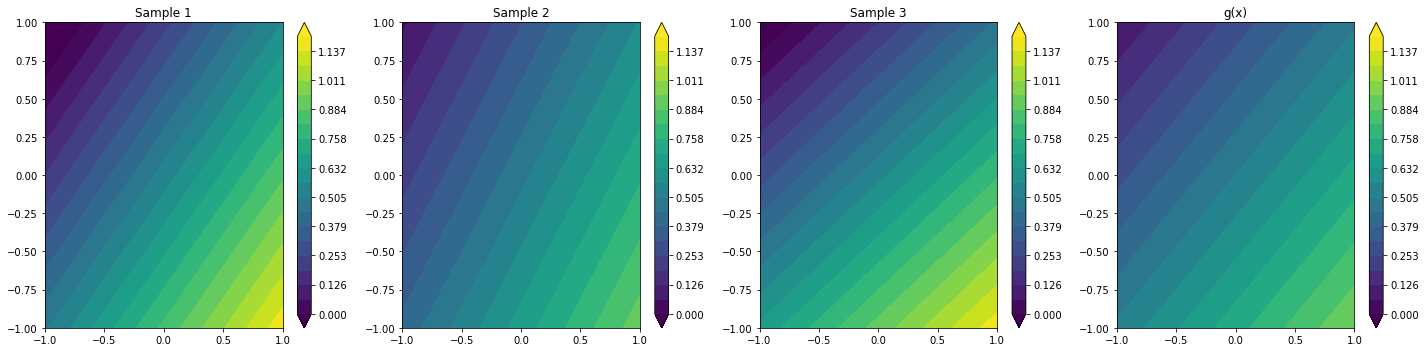

Degree= 1 lambda= 1e-07
Bias = 0.0552553009946358
Variance = 0.004338638965843787
MSE = 0.059593939960480624


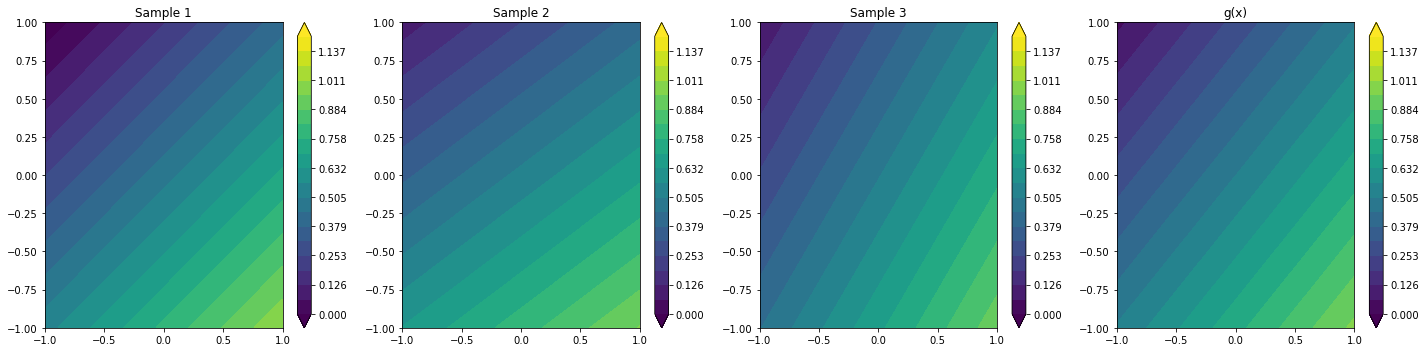

Degree= 1 lambda= 1e-05
Bias = 0.05530869052866985
Variance = 0.0035670181241264786
MSE = 0.058875708652796094


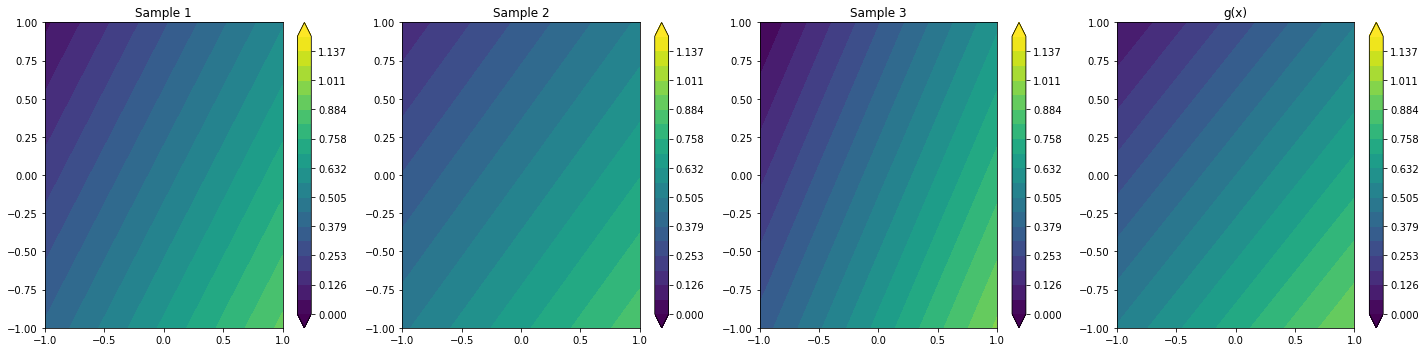

Degree= 1 lambda= 0.001
Bias = 0.05522121980179055
Variance = 0.004106561822844675
MSE = 0.05932778162463628


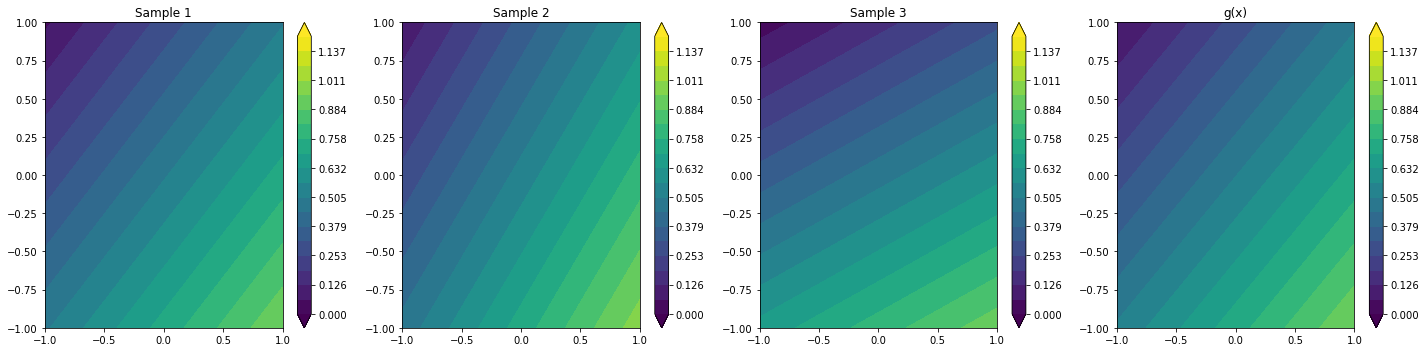

Degree= 1 lambda= 0.1
Bias = 0.05520496072542019
Variance = 0.003866142925991731
MSE = 0.05907110365141087


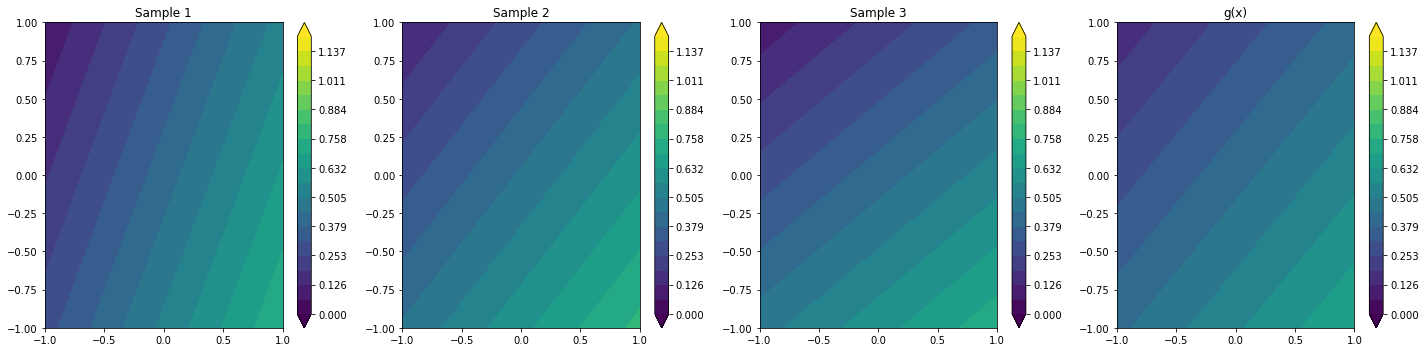

Degree= 1 lambda= 10.0
Bias = 0.06527581099082536
Variance = 0.0016756276045362148
MSE = 0.06695143859536318


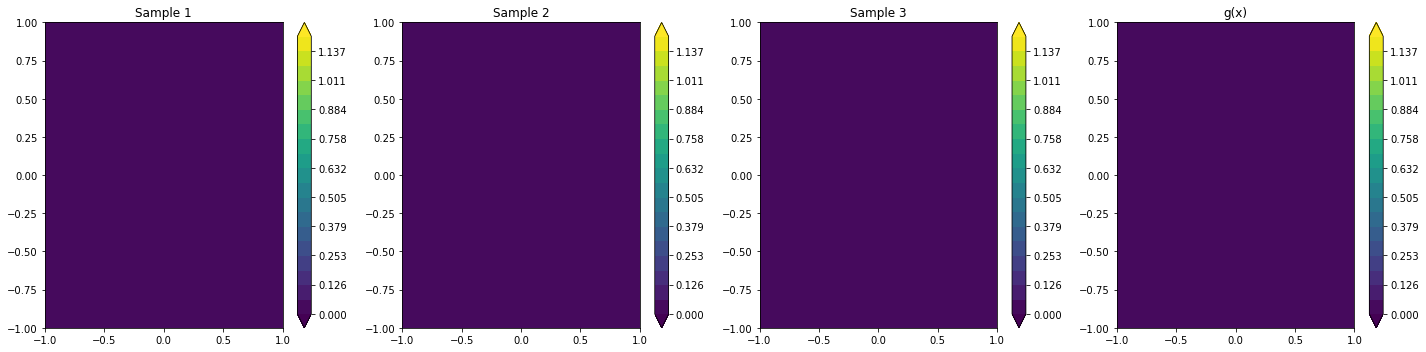

Degree= 1 lambda= 1000.0
Bias = 0.3077339232608626
Variance = 6.965628922210168e-06
MSE = 0.30774088888978973


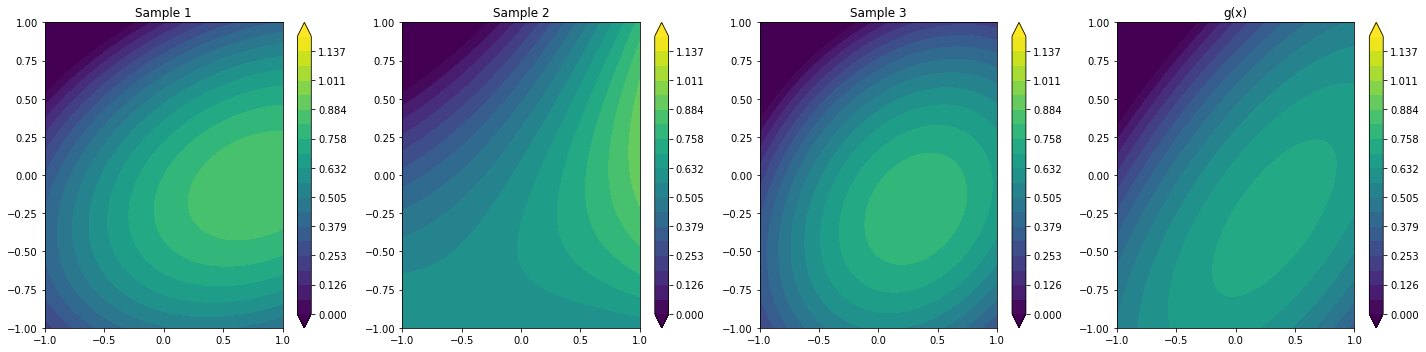

Degree= 2 lambda= 1e-07
Bias = 0.034817232650382564
Variance = 0.005808337308373724
MSE = 0.04062556995875609


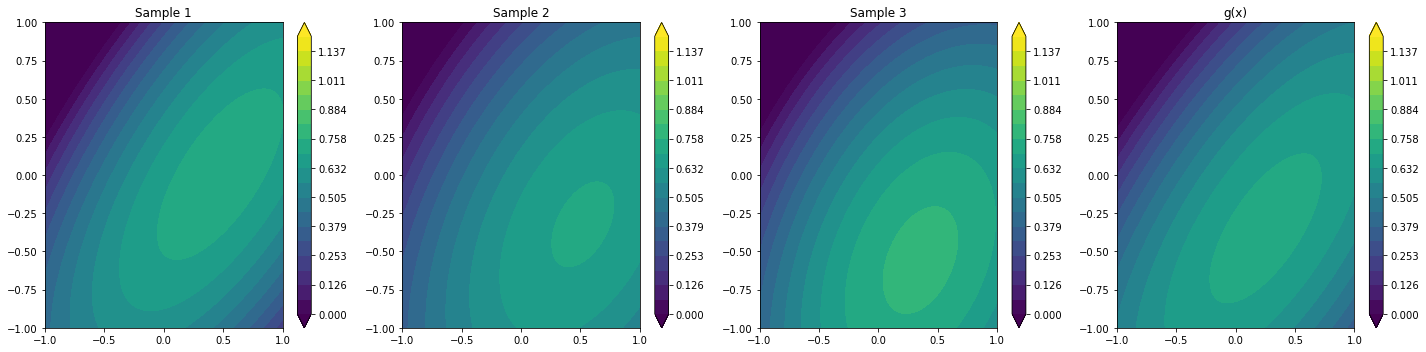

Degree= 2 lambda= 1e-05
Bias = 0.03475659936814114
Variance = 0.005340922144953524
MSE = 0.0400975215130943


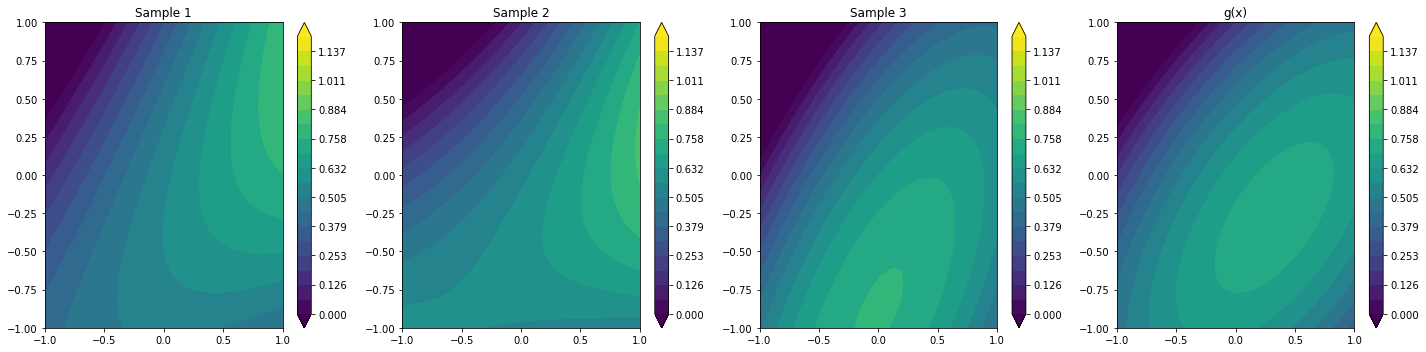

Degree= 2 lambda= 0.001
Bias = 0.03466331988072
Variance = 0.0052978870015421165
MSE = 0.039961206882262915


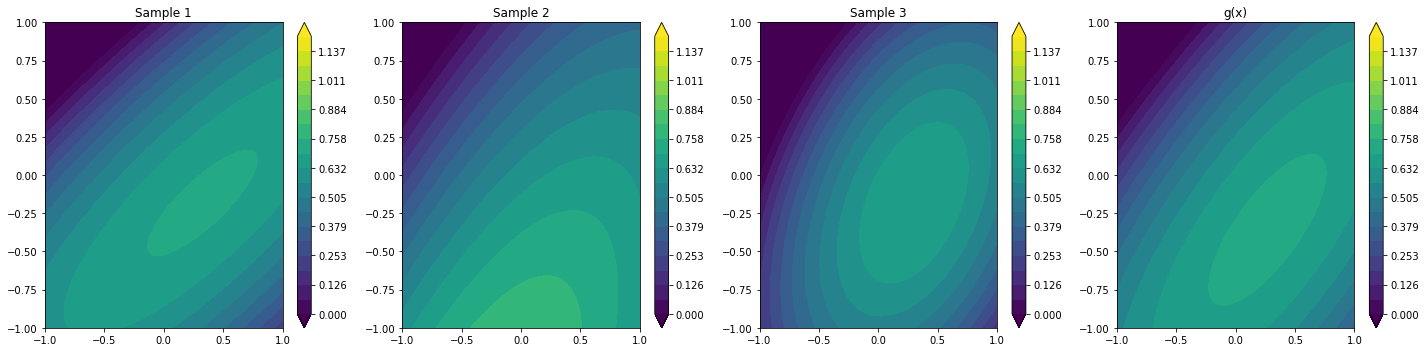

Degree= 2 lambda= 0.1
Bias = 0.0350343142856853
Variance = 0.005928966420167191
MSE = 0.04096328070585355


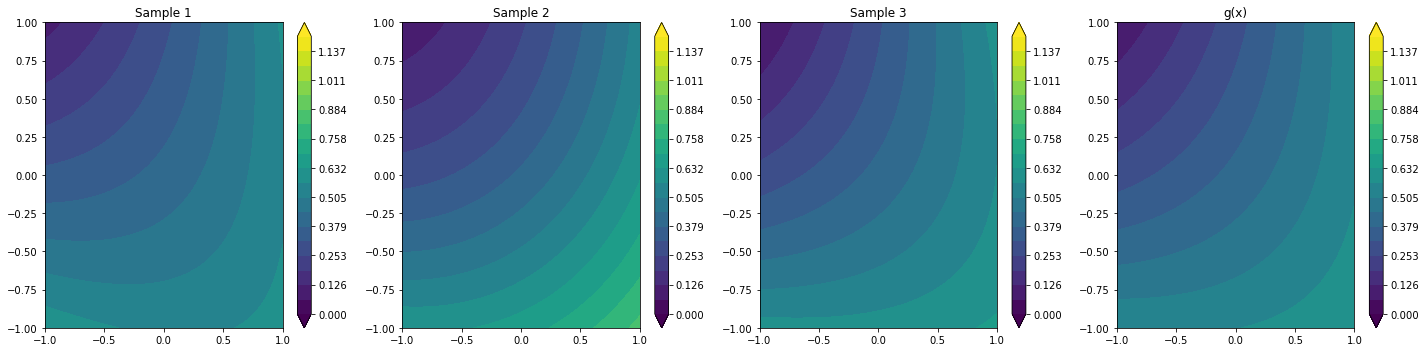

Degree= 2 lambda= 10.0
Bias = 0.06221268651545407
Variance = 0.002020770678481709
MSE = 0.06423345719393561


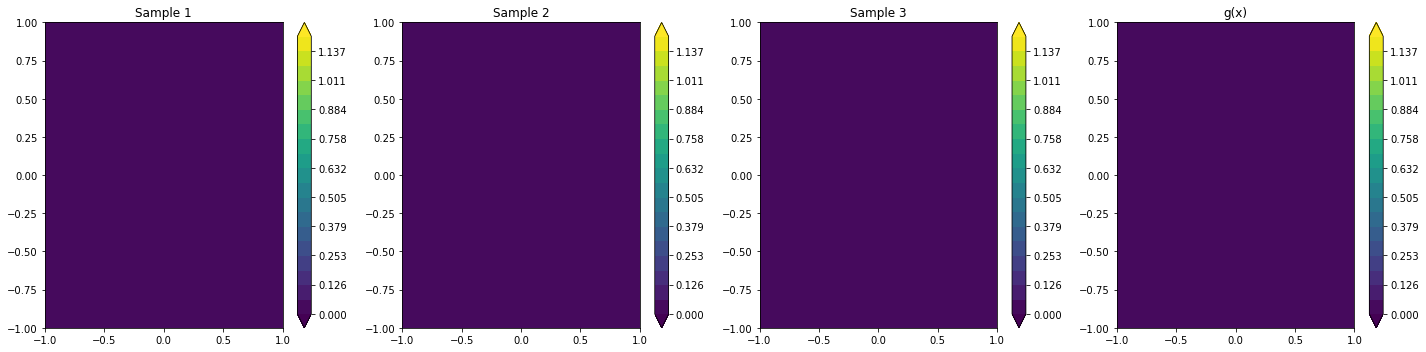

Degree= 2 lambda= 1000.0
Bias = 0.3039691809569191
Variance = 9.54502691758032e-06
MSE = 0.30397872598384185


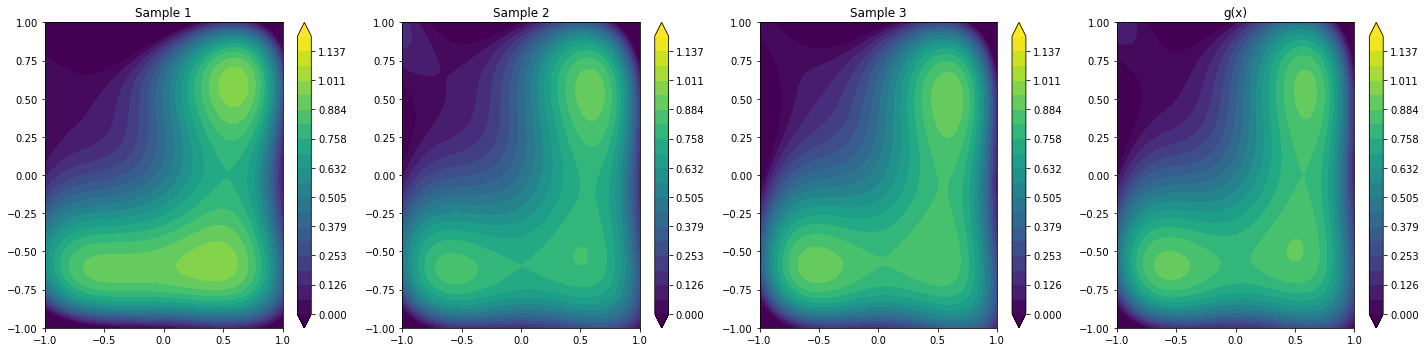

Degree= 4 lambda= 1e-07
Bias = 0.00776256343884571
Variance = 0.013085556389983684
MSE = 0.02084811982882932


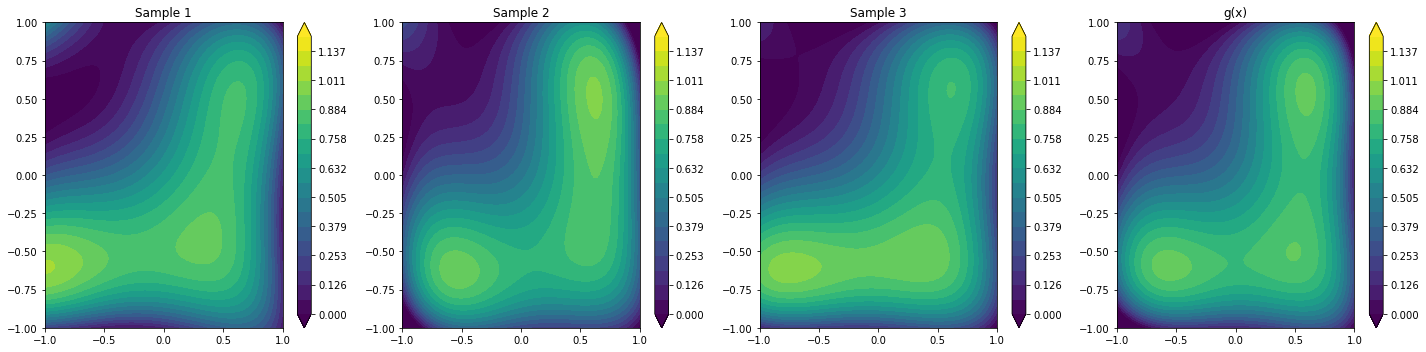

Degree= 4 lambda= 1e-05
Bias = 0.007680384711080029
Variance = 0.009135452269115198
MSE = 0.016815836980194936


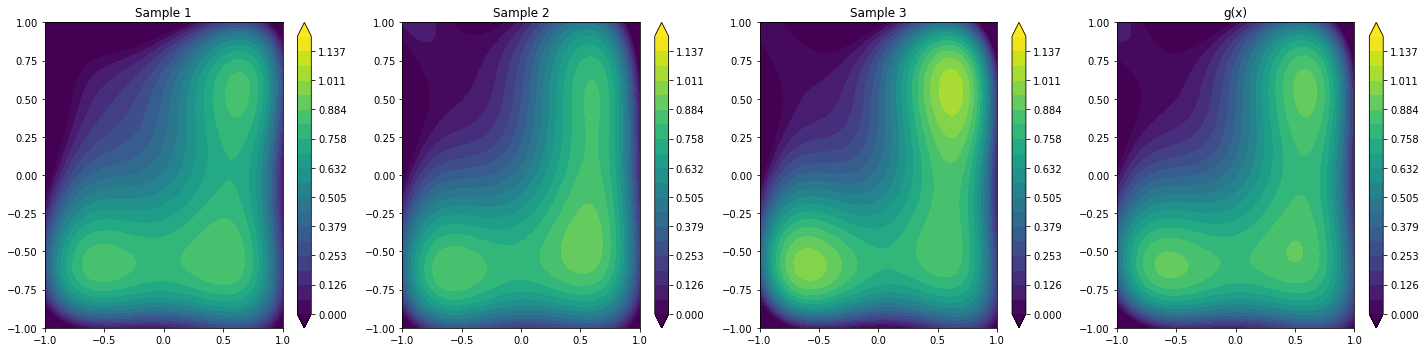

Degree= 4 lambda= 0.001
Bias = 0.00812514787809101
Variance = 0.008664303489216244
MSE = 0.016789451367307716


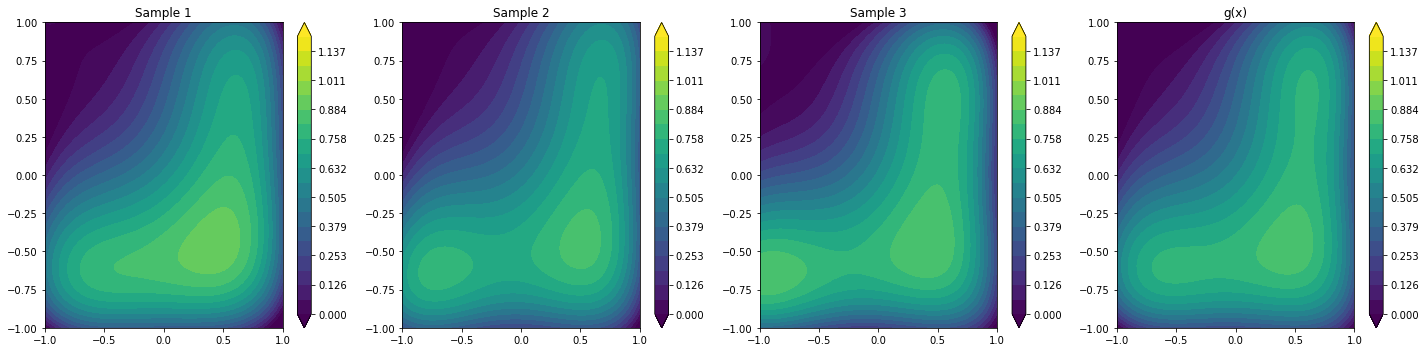

Degree= 4 lambda= 0.1
Bias = 0.009010920172927133
Variance = 0.003904461377027093
MSE = 0.01291538154995396


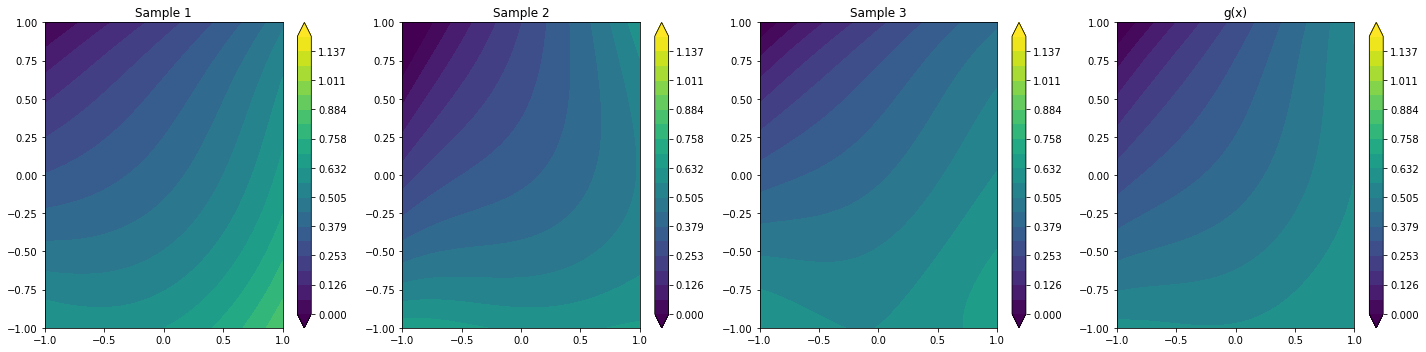

Degree= 4 lambda= 10.0
Bias = 0.05941956095443502
Variance = 0.0023842083218999347
MSE = 0.06180376927633396


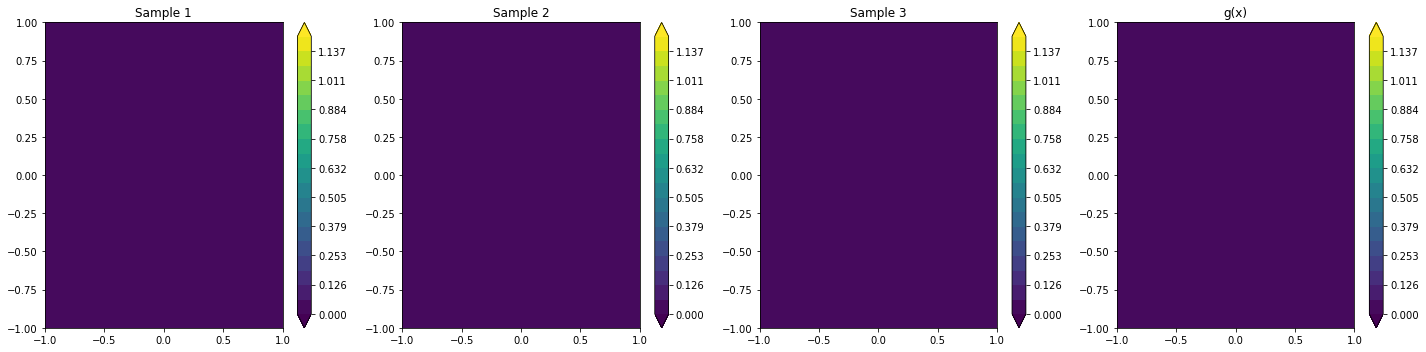

Degree= 4 lambda= 1000.0
Bias = 0.30231524389765657
Variance = 1.013458671382858e-05
MSE = 0.3023253784843652


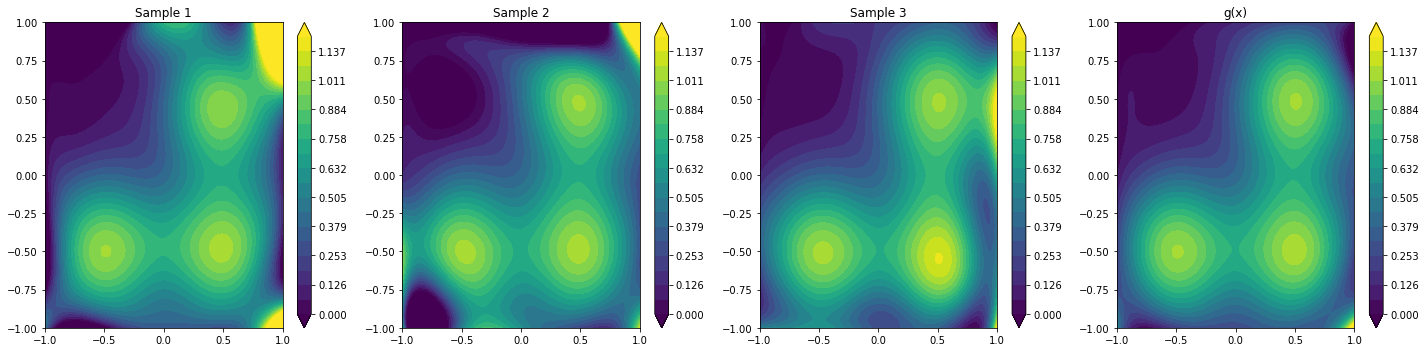

Degree= 8 lambda= 1e-07
Bias = 0.005391006787094118
Variance = 0.17525856336964205
MSE = 0.18064957015673008


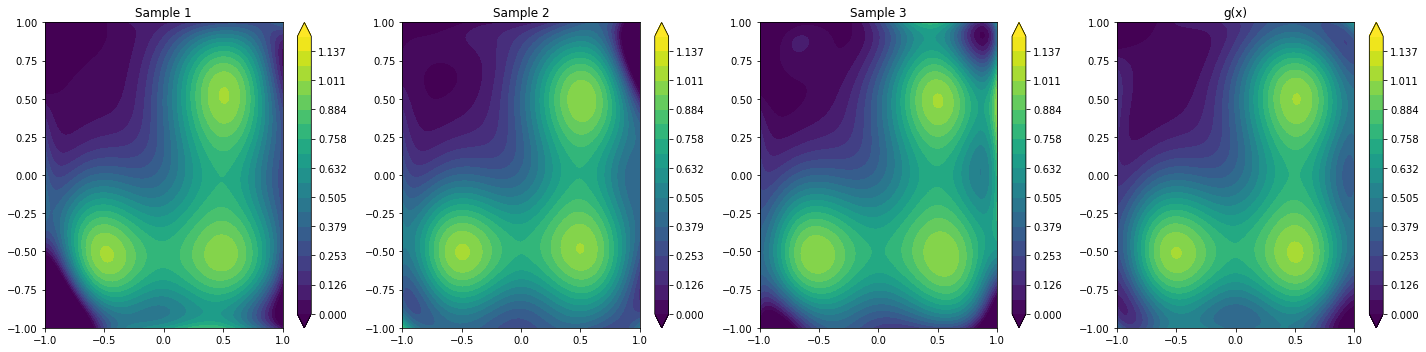

Degree= 8 lambda= 1e-05
Bias = 0.0024431053425794783
Variance = 0.04158283176610295
MSE = 0.044025937108681114


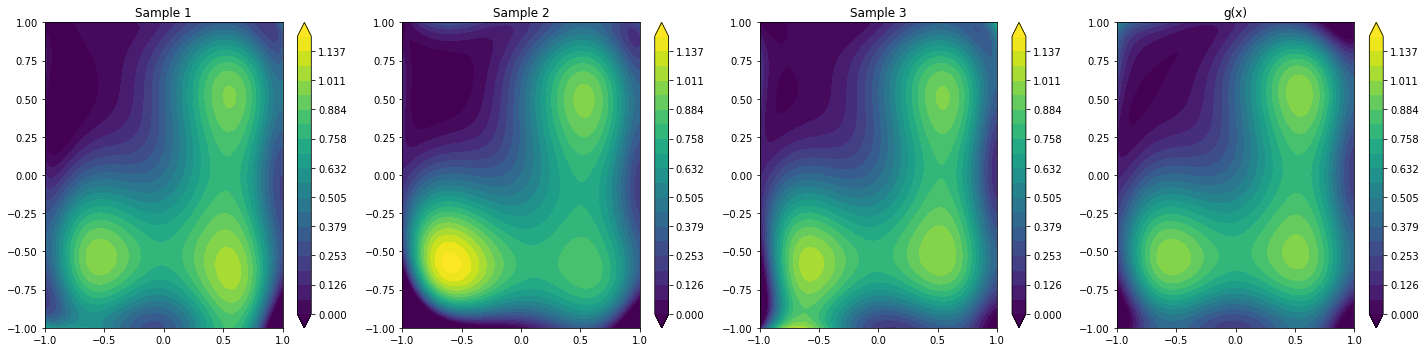

Degree= 8 lambda= 0.001
Bias = 0.005496407641153403
Variance = 0.02135066218541059
MSE = 0.026847069826562597


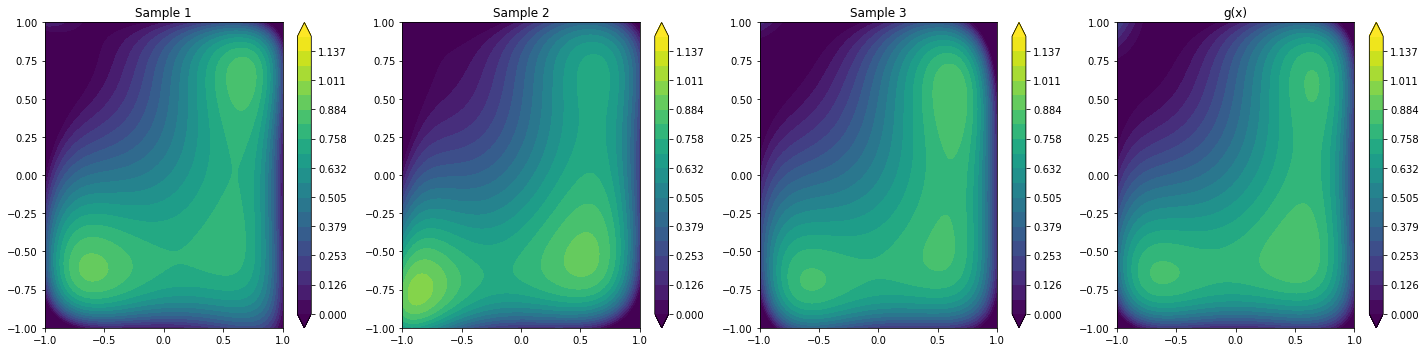

Degree= 8 lambda= 0.1
Bias = 0.009787839817444357
Variance = 0.0065496108096484195
MSE = 0.016337450627093218


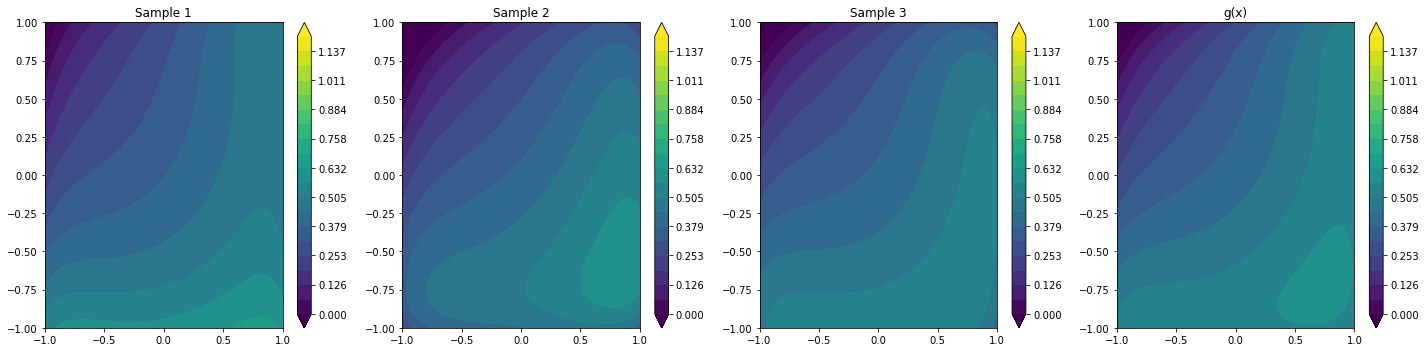

Degree= 8 lambda= 10.0
Bias = 0.055822883769455
Variance = 0.0029697400862557077
MSE = 0.05879262385571214


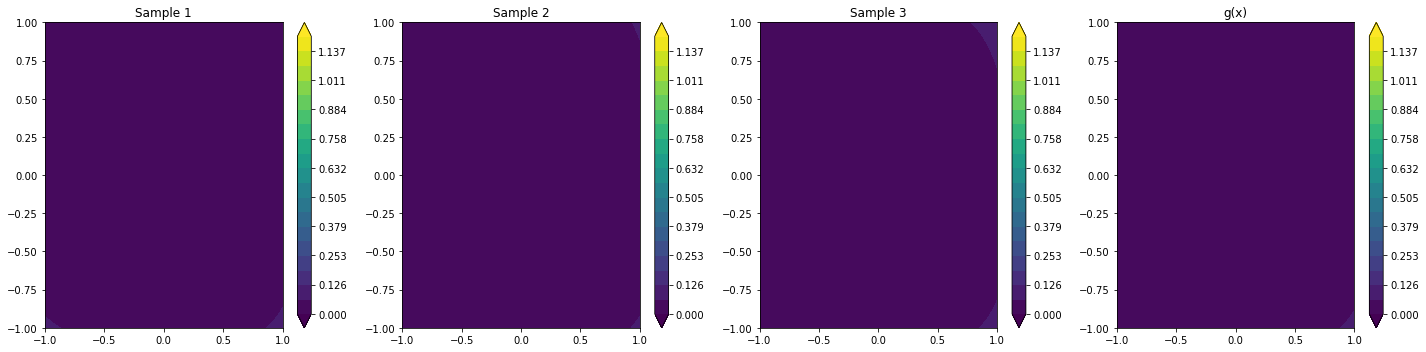

Degree= 8 lambda= 1000.0
Bias = 0.30143752384741757
Variance = 1.364654269443424e-05
MSE = 0.30145117039010977


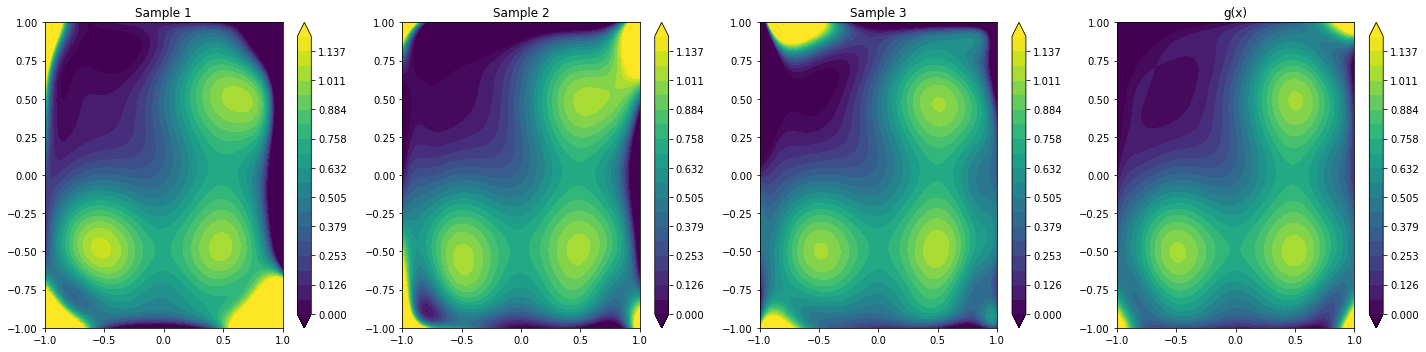

Degree= 16 lambda= 1e-07
Bias = 0.03306960579182033
Variance = 0.45697283749339673
MSE = 0.4900424432852021


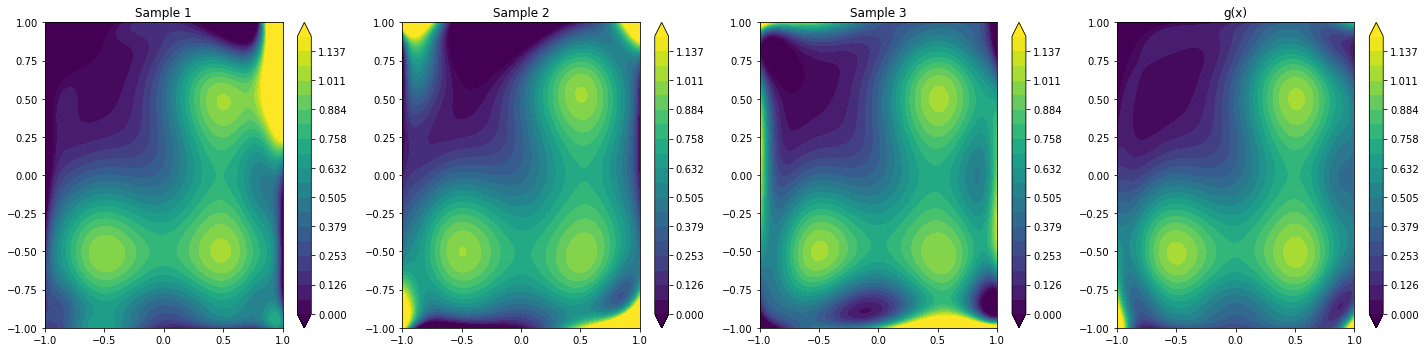

Degree= 16 lambda= 1e-05
Bias = 0.013780275566871057
Variance = 0.18984910963686308
MSE = 0.20362938520374355


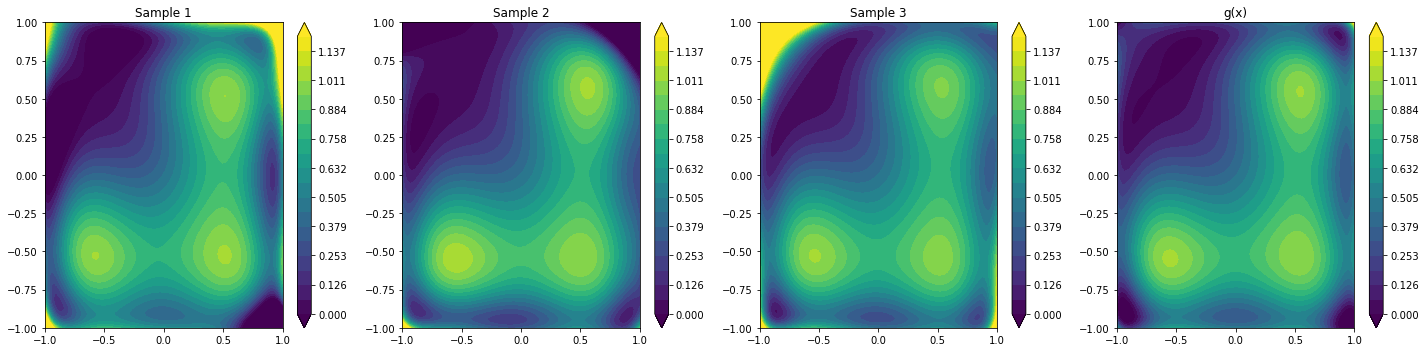

Degree= 16 lambda= 0.001
Bias = 0.006227626265541232
Variance = 0.06027707123851222
MSE = 0.06650469750405226


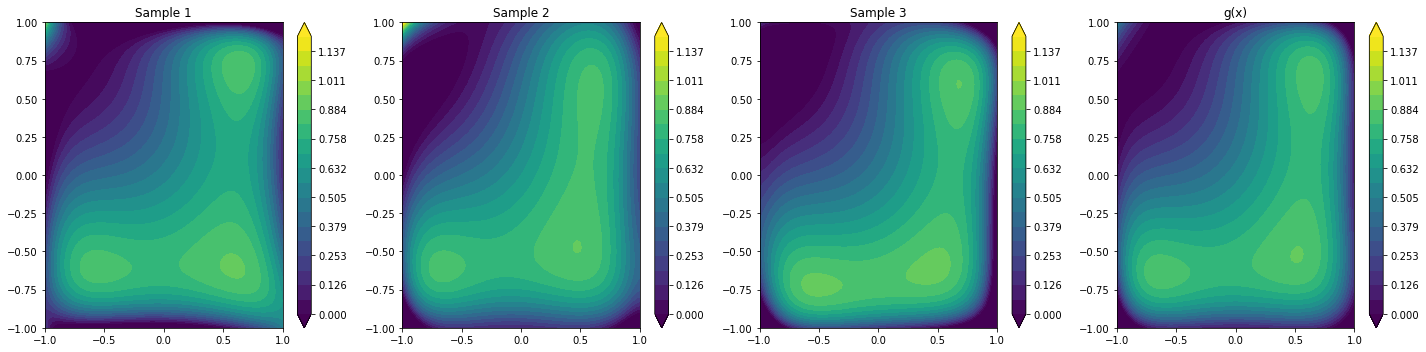

Degree= 16 lambda= 0.1
Bias = 0.013643438299722211
Variance = 0.013403596308596596
MSE = 0.027047034608317703


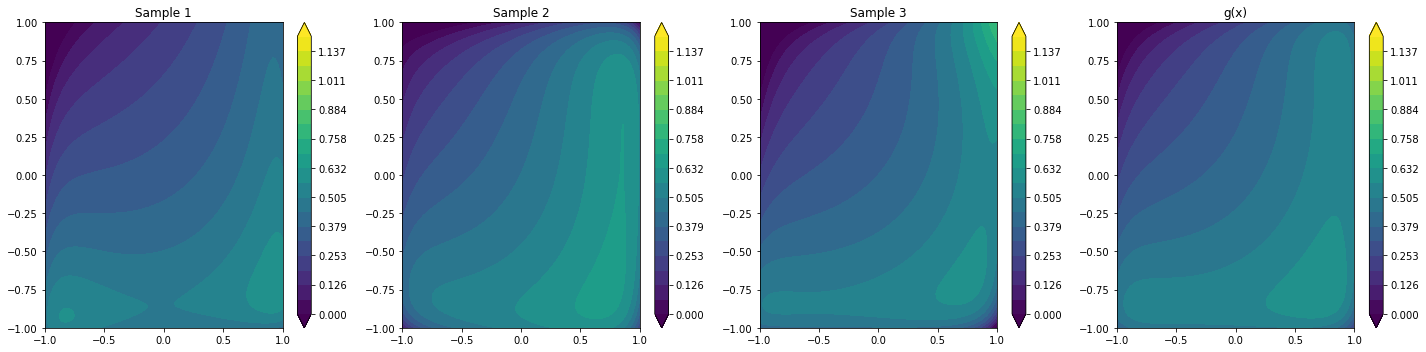

Degree= 16 lambda= 10.0
Bias = 0.053511258592839374
Variance = 0.0026889492170566014
MSE = 0.05620020780989596


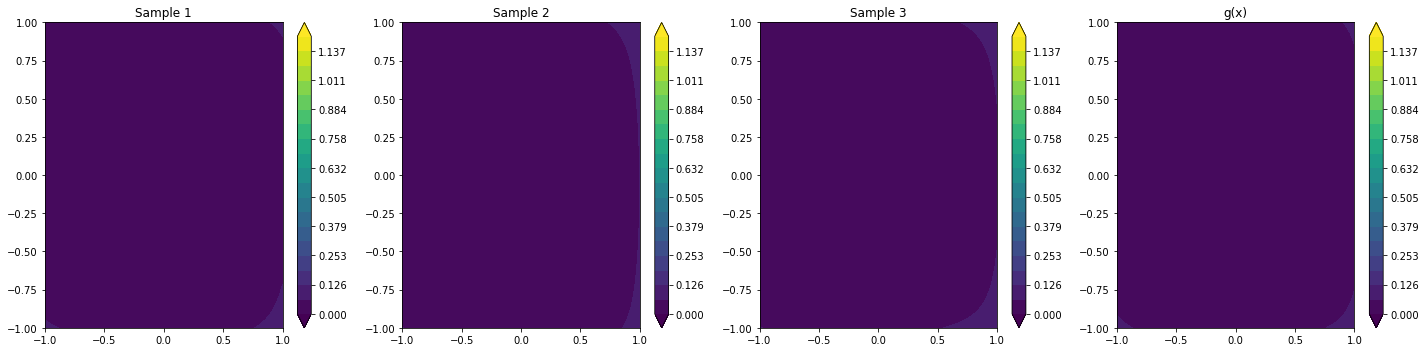

Degree= 16 lambda= 1000.0
Bias = 0.30119020981002287
Variance = 1.892401189584084e-05
MSE = 0.3012091338219184


In [29]:
# Cell type : CodeWrite

def featurevector(x,k):
    vec = []
    for r in range(k+1):
        if r == 0 :
            vec.append(1)
        else :
            for i in range(r+1) :
               vec.append((x[0]**(r-i))*(x[1]**i))
    return vec 
def Y_func(X):
    #X is of dimension (n,2) output (n,)
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    Y = []
    for x in X :
        #print(a)
        temp = np.exp((np.linalg.norm(np.subtract(a,x))**2)*(-4))
        temp = temp + np.exp((np.linalg.norm(np.subtract(b,x))**2)*(-4))
        temp = temp + np.exp((np.linalg.norm(np.subtract(c,x))**2)*(-4))
        Y.append(temp)
    return np.array(Y)



def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    wt_vector = wt_vector.T  #making it d'*1
    phi = []
    for x in X_train:
        phi.append(np.array(featurevector(x,degree)))
    phi = np.array(phi)
    #phi is n*d'  and we need n*1
    
    return (np.matmul(phi,wt_vector)).T   # a 1*n output
    
    
    

    
    
def visualise_polynomial_2d(wt_vector, degree,fig,ax,title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    #wt_vector is 1*d' 
    
    Z = np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            l = np.array(featurevector(np.array([X[i][j],Y[i][j]]),degree))   #this is 1*d'
            Z[i][j] = np.matmul(wt_vector,l.T)
        

    # Get Z using other functions
    
    s = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both')
    #ax[index].title(title)
    fig.colorbar(s,ax = ax)
    ax.set_title(title)
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = []
    for i in X_train:
        phi.append(np.array(featurevector(x,degree)))
    phi = np.array(phi)
    d = len(phi[0])
    phiTphi = np.matmul(np.transpose(phi),phi)
    lamdaI = (reg_param * np.identity(d,dtype = float))
    x = np.matmul(np.matmul((np.linalg.inv(phiTphi+lamdaI)),np.transpose(phi)),Y_train.T)
    return x.T

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    global count
    f = []
    for i in range(100):
        x = (np.random.uniform(-1,1,50))
        y = (np.random.uniform(-1,1,50))
        X_train = np.c_[x.ravel(),y.ravel()]
        Y_train = Y_func(X_train)
        f.append(polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param))
    f = np.array(f)
    g = np.sum(f,axis = 0)/100
    
    fig,ax = plt.subplots(1,4,figsize = (20,5))
    visualise_polynomial_2d(f[0],degree,fig,ax[0],'Sample 1')
    visualise_polynomial_2d(f[1],degree,fig,ax[1],'Sample 2')
    visualise_polynomial_2d(f[2],degree,fig,ax[2],'Sample 3')
    visualise_polynomial_2d(g,degree,fig,ax[3],'g(x)')
    
    plt.tight_layout()
    plt.show()
    
    #compute the variance bias mean squared error. 
    x,y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X = np.zeros([100,100,2],dtype = (float,float))
    for i in range(100):
        for j in range(100):
            X[i][j] = (x[i][j],y[i][j])
    
    bias_squared = 0
    for i in range(100):
        for j in range(100):
            #print(len(X[i][j]))
            a = np.matmul(g,np.array(featurevector(X[i][j],degree)).T)
            b = (Y_func([X[i][j]]))[0]
            bias_squared = (bias_squared + ((a-b)*(a-b)))
    bias_squared = (bias_squared)/(1e4)
    
    variance = 0
    for ii in range(100):
        for i in range(100):
            for j in range(100):
                a = np.matmul(g,np.array(featurevector(X[i][j],degree)).T)
                b = np.matmul(f[ii],np.array(featurevector(X[i][j],degree)).T)
                variance = (variance + ((a-b)*(a-b)))
    variance = (variance)/1e6
    
    mean_squared_error = 0
    for ii in range(100):
        for i in range(100):
            for j in range(100):
                a = np.matmul(f[ii],np.array(featurevector(X[i][j],degree)).T)
                b = (Y_func([X[i][j]]))[0]
                mean_squared_error= (mean_squared_error + ((a-b)*(a-b)))
    mean_squared_error = (mean_squared_error)/1e6
        
    
    return (bias_squared,variance,mean_squared_error)
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        #plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

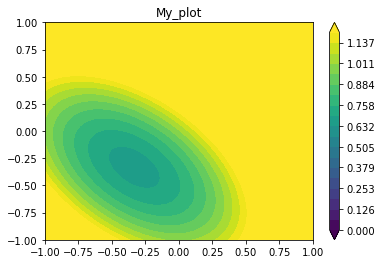

In [31]:
# Cell type: convenience
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    #wt_vector is 1*d' 
    
    Z = np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            l = np.array(featurevector(np.array([X[i][j],Y[i][j]]),degree))   #this is 1*d'
            Z[i][j] = np.matmul(wt_vector,l.T)
        

    # Get Z using other functions
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),extend = 'both')
    plt.title(title)
    plt.colorbar()
    
visualise_polynomial_2d(np.array([1,1,1,1,1,1]),2,"My_plot")
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)


** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




[[4.09653332e-02 4.09653328e-02 4.09652895e-02 4.09609634e-02
  4.05318901e-02 1.76274344e-02]
 [3.24989695e-01 3.24989685e-01 3.24988628e-01 3.24882999e-01
  3.14837952e-01 1.63230452e-01]
 [2.09059633e-01 2.09059628e-01 2.09059062e-01 2.09009267e-01
  2.06464766e-01 4.44731954e-02]
 [2.34709726e+02 1.70287518e+02 1.86232125e+01 9.41407055e-01
  1.97743152e-01 7.54287031e-02]
 [2.49461464e+02 2.32685895e+02 6.97590963e+01 3.50807197e+00
  8.28030921e-01 7.64090985e-01]]
0.01762743436563446
[[1.21311259e-02 1.21311259e-02 1.21311190e-02 1.21304334e-02
  1.20621634e-02 7.32448639e-03]
 [2.91402982e-01 2.91402979e-01 2.91402659e-01 2.91370698e-01
  2.88228202e-01 1.75427152e-01]
 [1.79056197e-01 1.79056188e-01 1.79055364e-01 1.78973267e-01
  1.72794445e-01 6.20525181e-02]
 [7.83689585e-01 7.82200889e-01 6.60367389e-01 2.43972900e-01
  1.91731586e-01 9.69581861e-02]
 [5.29761541e+01 1.22508554e+01 2.46735851e+01 1.25473318e+00
  7.98404792e-01 7.90950193e-01]]
0.007324486386255353
[[0.007

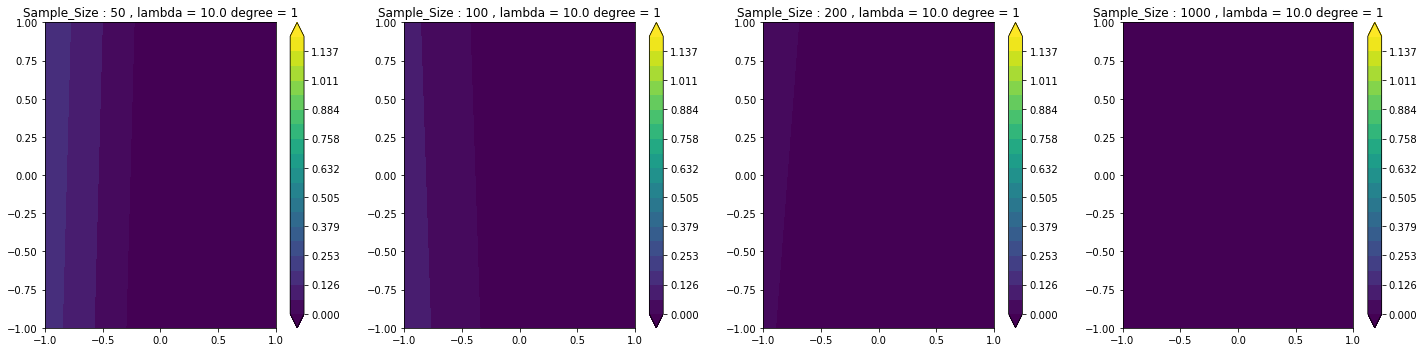

In [67]:
# Cell type : CodeWrite 
x = np.load("C:\\Users\\hp\\Desktop\\PRML\\Archive\\dataset4_1.npz")
X_train = x['arr_0']
Y_train = x['arr_1']
X_test =  x['arr_2']
Y_test =  x['arr_3']


degree_list = [1,2,4,8,16]
param_list = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

def getminimum(table):
    a = 0
    b = 0
    curr = table[0][0]
    for i in range(5):
        for j in range(6):
            if(table[i][j] <= curr) :
                curr = table[i][j]
                a = i
                b = j
    return (a,b)

fig,ax = plt.subplots(1,4,figsize = (20,5))
count = 0
for n in [50,100,200,1000] :
    funlist = []
    table = np.zeros([5,6],dtype = 'float')
    i = 0
    for degree in degree_list:
        j = 0
        for reg_param in param_list:
            f = polynomial_regression_ridge_train(X_train[:n],Y_train[:n],degree,reg_param)
            funlist.append(f)
            mse = 0
            for ii in range(len(X_test)):
                a = np.matmul(f,np.array(featurevector(X_test[ii],degree)).T)
                b = Y_test[i]
                mse = (mse+((a-b)*(a-b)))
            mse = mse/len(X_test)
            table[i][j] = mse
            j = (j+1)
        i = (i+1)
    (i,j) = getminimum(table)
    f = funlist[(i*6)+j]
    visualise_polynomial_2d(f,degree_list[i],fig,ax[count],('Sample_Size : '+str(n)+ ' , lambda = '+str(param_list[j])+ ' degree = '+ str(degree_list[i])))
    count = count+1
    print(table)
    print(table[i][j])
plt.tight_layout()
plt.show()


** Cell type : TextWrite **

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












In [ ]:
# Cell type : CodeWrite 


** Cell type : TextWrite **